# PHYS3116 Computational Assessment: Area 51 Interns

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Introduction to assessment
**Accreted Milky Way Globular Clusters**

Using data from the Harris Catalogue of Milky Way globular clusters and vandenBerg et al. (2013), use
stellar population (metallicities [Fe/H] and ages) and dynamical information to identify potentially
accreted globular clusters. Consider if there are some globular clusters that stand out in the agemetallicity relation or that do not rotate with the bulk of other globular clusters.

Consider what the above findings might mean for how the Milky Way formed and how many of its
globular clusters could be accreted and how many may have formed within the Milky Way. Consider
what further tests could be performed to delineate various possible formation scenarios.

Reformatted .csv versions of relevant data tables have been uploaded to Moodle for convenience.

## Part 1: Process
**1) Research**

- **Objective**: Identify potentially accreted globular clusters by the age-Metallicity relation.

- **Background knowlegde**: Looking through the formation of the Milky Way, it is proved that the oldest clusters formed from the early stage of the galaxy are most metal-poor clusters while the later ones are more metal-rich due to chemical enrichment. Thus, we can claim that accreted clusters will not follow this trend. Specifically, they can be have unusual [Fe/H] for their age like younger than other metal-poor clusters.

- **Methodology**:  We use a simple binning approach to calculate expected ages for given metallicities, then detect accreted clusters by significant deviations.

**2) Data curation**

In [11]:
harris = pd.read_csv('HarrisPartI.csv')
krause = pd.read_csv('Krause21.csv')

harris['Object'] = harris['ID'].str.replace(' ', '')

merge = pd.merge(harris, krause, on='Object')
print("Final sample:", len(merge), "globular clusters")

Final sample: 59 globular clusters


**3) Analytical Method**

1. First, we create 6 equal-sized bins for the metallicity values and calculate the median ages for each groups. 

In [12]:
merge['FeH_Bin'] = pd.cut(merge['FeH'], bins=6, labels=False)
median_ages = merge.groupby('FeH_Bin')['Age'].median()

2. Then, we calculate age deviations.

In [13]:
merge['Expected_Age'] = merge['FeH_Bin'].map(median_ages)
merge['Age_Deviation'] = merge['Age'] - merge['Expected_Age']

3. Now, we can detect young outliers (1+ Gyr younger than expected).

In [14]:
young_outliers = merge[merge['Age_Deviation'] < -1.0]
normal_clusters = merge[merge['Age_Deviation'] >= -1.0]

## Part 2: Results
**1) Findings on Age-Metallicity plane**

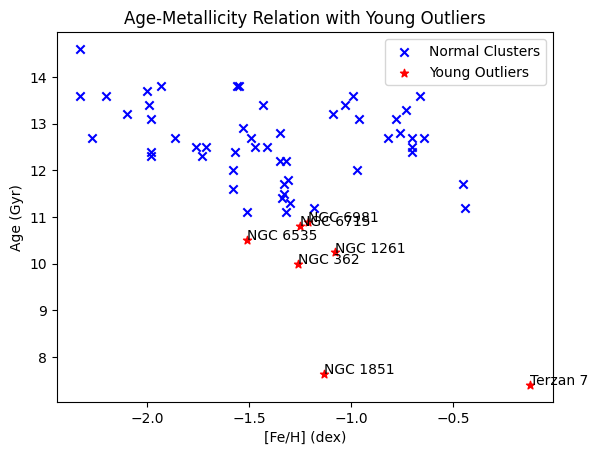

In [15]:
plt.scatter(
    normal_clusters['FeH'], 
    normal_clusters['Age'], 
    color='blue',
    marker='x',  
    label='Normal Clusters'
)
plt.scatter(
    young_outliers['FeH'], 
    young_outliers['Age'], 
    color='red', 
    marker='*', 
    label='Young Outliers'
)

# Annotate significant outliers
for i, row in young_outliers.iterrows():
    plt.annotate(
        row['ID'], 
        (row['FeH'], row['Age']),
    )

plt.xlabel('[Fe/H] (dex)')
plt.ylabel('Age (Gyr)')
plt.title('Age-Metallicity Relation with Young Outliers')
plt.legend()
plt.show()

- From the graph, we found 7 clusters showing extreme negative age deviations.

**2) Spatial Distribution Analysis**

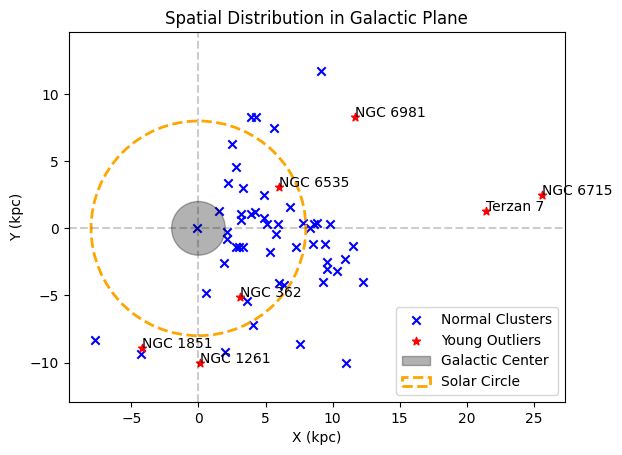

In [16]:
plt.scatter(
    normal_clusters['X'], 
    normal_clusters['Y'], 
    c='blue',
    marker='x',
    label='Normal Clusters'
)
plt.scatter(
    young_outliers['X'], 
    young_outliers['Y'], 
    color='red',
    marker='*',
    label='Young Outliers'
)

# Get current axes to add circles
axe = plt.gca()

# Galactic reference frames
galactic_center = plt.Circle(
    (0, 0), 2, 
    color='black',
    alpha=0.3,
    label='Galactic Center'
)
solar_circle = plt.Circle(
    (0, 0), 8, 
    color='orange', 
    fill=False, 
    linestyle='--', 
    linewidth=2, 
    label='Solar Circle'
)

# Add circles to the plot
axe.add_patch(galactic_center)
axe.add_patch(solar_circle)

# Axes lines
plt.axhline(y=0, color='k', linestyle='--', alpha=0.2)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.2)

# Annotate significant outliers
for i, row in young_outliers.iterrows():
    plt.annotate(
        row['ID'], 
        (row['X'], row['Y']),
    )

plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.title('Spatial Distribution in Galactic Plane')
plt.legend()
plt.axis('equal')
plt.show()

- We can see from the graph that younger outliers have positions far away from galactic center with 5/7 located beyond the Solar Circle.

**3) Statistical Validation**

1. Age Deviation Distribution

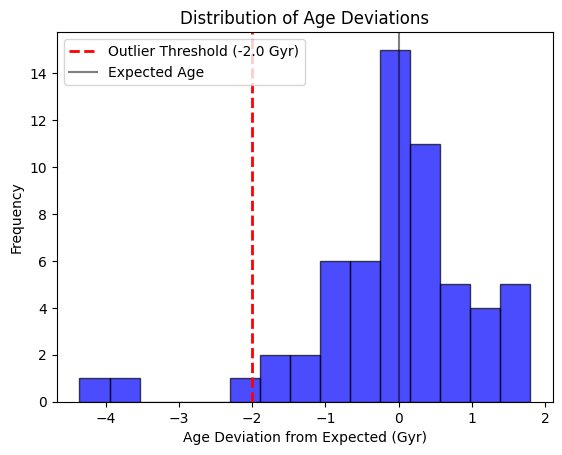

In [17]:
age_deviations = merge['Age_Deviation']
plt.hist(
    age_deviations, 
    bins=15, 
    color='blue', 
    edgecolor='black', 
    alpha=0.7
)
plt.axvline(
    -2.0, 
    color='red', 
    linestyle='--', 
    linewidth=2, 
    label='Outlier Threshold (-2.0 Gyr)'
)
plt.axvline(
    0, 
    color='black', 
    linestyle='-', 
    alpha=0.5, 
    label='Expected Age'
)

plt.xlabel('Age Deviation from Expected (Gyr)')
plt.ylabel('Frequency')
plt.title('Distribution of Age Deviations')
plt.legend()
plt.show()

2. Distance Comparison

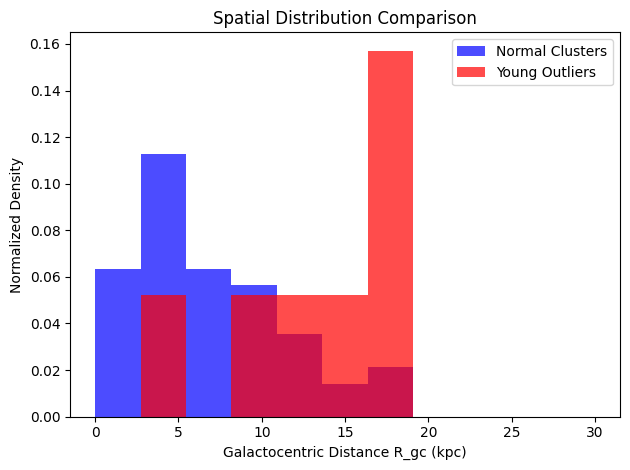

In [18]:
bins = np.linspace(0, 30, 12)
plt.hist(
    normal_clusters['R_gc'], 
    bins=bins, 
    color='blue', 
    alpha=0.7, 
    density=True, 
    label='Normal Clusters'
)
plt.hist(
    young_outliers['R_gc'], 
    bins=bins, 
    color='red', 
    alpha=0.7, 
    density=True, 
    label='Young Outliers'
)
plt.xlabel('Galactocentric Distance R_gc (kpc)')
plt.ylabel('Normalized Density')
plt.title('Spatial Distribution Comparison')
plt.legend()

plt.tight_layout()
plt.show()

- From above graph and our own observation, we can probably conclude that these 7 following clusters would be accreted globular clusters in Milky Way:

In [19]:
candidate_display = young_outliers[['ID', 'FeH', 'Age', 'Age_Deviation', 'R_gc']].copy()
candidate_display = candidate_display.sort_values('Age_Deviation')
candidate_display['Age_Deviation'] = candidate_display['Age_Deviation']
print(candidate_display)

          ID   FeH    Age  Age_Deviation  R_gc
4   NGC 1851 -1.13   7.64          -4.36  16.6
51  Terzan 7 -0.12   7.40          -3.80  15.6
2    NGC 362 -1.26  10.00          -2.00   9.4
3   NGC 1261 -1.08  10.24          -1.76  18.1
38  NGC 6535 -1.51  10.50          -1.50   3.9
46  NGC 6715 -1.25  10.80          -1.20  18.9
55  NGC 6981 -1.21  10.90          -1.10  12.9
